# Boston Housing 

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_boston

### Load data

In [2]:
# Load data
boston = load_boston()

In [3]:
# Boston Housing Dataset
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Boston Housing Dataset
df = pd.DataFrame(boston['data'], columns=boston["feature_names"]) # create new data frame 
df["target"] = boston["target"] # add target as column in the data
df 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Explore data

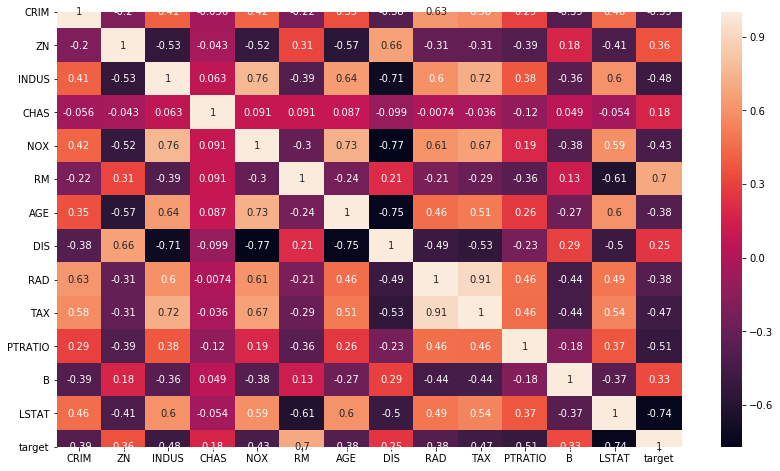

In [5]:
# plot the relations between columns
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True)


### **Cost Functions**

In [6]:
def cost_functions(true, pred):
    """
    This function to calculate Cost Functions and print output

      Input:
        true: list of the true value for target
        pred: list of the predict value for target


    """
    result_dict = {}
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)

    ls = [mse, mae]
    ls2 = ["MSE", "MAE"]

    for x in range(len(ls)):
        print(f"The result for {ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    return result_dict


### **Create models**

**Create model using all features**

In [7]:
X = df.drop("target", axis=1)
y = df[["target"]]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2)

In [8]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
312,0.26169,0.0,9.90,0.0,0.544,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72
328,0.06617,0.0,3.24,0.0,0.460,5.868,25.8,5.2146,4.0,430.0,16.9,382.44,9.97
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
205,0.13642,0.0,10.59,0.0,0.489,5.891,22.3,3.9454,4.0,277.0,18.6,396.90,10.87
231,0.46296,0.0,6.20,0.0,0.504,7.412,76.9,3.6715,8.0,307.0,17.4,376.14,5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47


In [9]:
# create the model using all features
lr = LinearRegression()

lr.fit(X_train,y_train)
lr.score(X_test, y_test)

0.7503116174489225

In [10]:
# Coefficients
lr.coef_

array([[-9.81915048e-02,  3.48400626e-02, -1.65945367e-02,
         3.36283135e+00, -1.61477570e+01,  3.57041012e+00,
         4.56458846e-03, -1.39585375e+00,  3.15975518e-01,
        -1.20505823e-02, -1.04852815e+00,  1.14536184e-02,
        -5.52653040e-01]])

In [11]:
# predictions
preds = lr.predict(pd.DataFrame(X_test))
res = cost_functions(y_test, preds)

The result for MSE: 22.160198304875582
The result for MAE: 3.2416565967950546


**Create model using the most affected features**

In [12]:
# feaures selection
X_train_2 = X_train[['ZN','RAD','PTRATIO','LSTAT','RM']]

X_test_2 = X_test[['ZN','RAD','PTRATIO','LSTAT','RM']]


In [13]:
# create the model using the most affected features
lr2 = LinearRegression()

lr2.fit(X_train_2,y_train)
lr2.score(X_test_2, y_test)

0.7158780522229022

In [14]:
# Coefficients
lr2.coef_

array([[-0.01750708,  0.01525998, -1.04442137, -0.6246016 ,  4.21385222]])

In [15]:
# predictions
preds_2 = lr2.predict(pd.DataFrame(X_test_2))
res2 = cost_functions(y_test, preds_2)

The result for MSE: 25.216226086209712
The result for MAE: 3.4604287164521472


### Finally,

The first model achieve the low amount of error. So, we can said the first model better than second. For future improvements, can use polynomial regression or use cross validation techniques.

### Save dataset as .csv file

In [16]:
df.to_csv('Boston_Housing.csv')